    studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgerse

c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


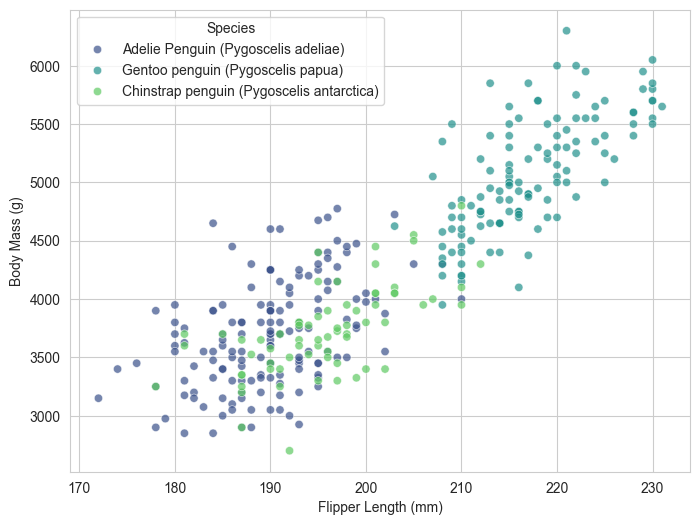

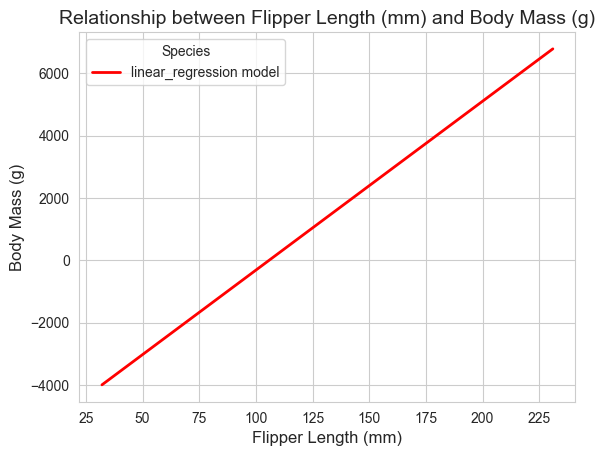

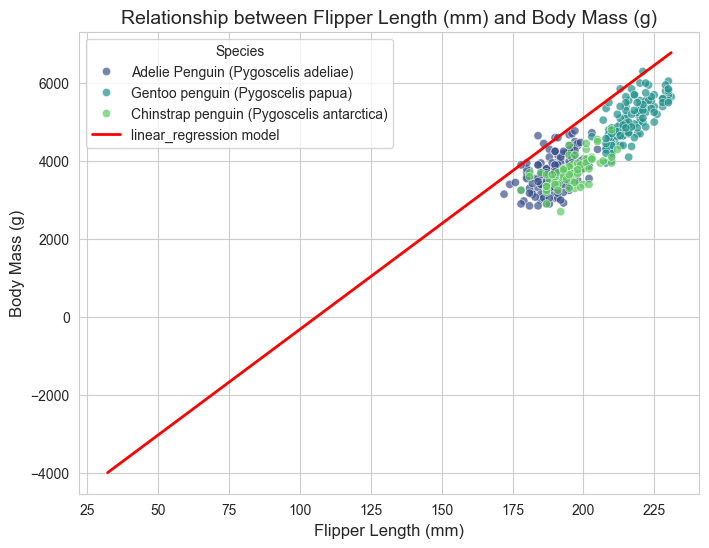

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# تنظیم استایل برای زیبایی نمودار
sns.set_style("whitegrid")

# بارگذاری داده‌ها
penguins = pd.read_csv("C:/Users/A.S.T.co/Downloads/penguins.csv")
print(penguins)

# انتخاب ستون‌های مورد نظر و حذف مقادیر گمشده
columns = ["Flipper Length (mm)", "Body Mass (g)", "Species", "Culmen Length (mm)", "Culmen Depth (mm)"]
penguins_non_missing = penguins[columns].dropna()

# تعریف X و y برای مدل رگرسیون
X = penguins_non_missing[["Flipper Length (mm)", "Culmen Length (mm)"]]  # متغیر مستقل
y = penguins_non_missing["Body Mass (g)"]  # متغیر وابسته

# نمایش X و y
print(X)
print(y)

# ایجاد و آموزش مدل رگرسیون خطی
model = LinearRegression()
model.fit(X, y)

# پیش‌بینی مقادیر برای رسم خط رگرسیون
# برای رسم، باید یک فضای جدید از مقادیر تولید کنیم که دو بعدی باشد
X_range = np.linspace(X.min().min(), X.max().max(), 100)  # تولید مقادیر بین کمینه و بیشینه X
X_range = np.column_stack([X_range, X_range])  # اضافه کردن هر دو ویژگی برای رسم

y_pred = model.predict(X_range)  # محاسبه مقادیر پیش‌بینی‌شده

# رسم نمودار پراکندگی با رنگ‌بندی بر اساس گونه پنگوئن
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["Flipper Length (mm)"], y=y, hue=penguins_non_missing["Species"], alpha=0.7, palette="viridis")
plt.show()

# رسم خط رگرسیون
plt.plot(X_range[:, 0], y_pred, color="red", linewidth=2, label="linear_regression model")

# تنظیمات نمودار
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Relationship between Flipper Length (mm) and Body Mass (g)", fontsize=14)
plt.legend(title="Species")
plt.show()

# رسم دوباره نمودار پراکندگی با رنگ‌بندی و خط رگرسیون
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["Flipper Length (mm)"], y=y, hue=penguins_non_missing["Species"], alpha=0.7, palette="viridis")
plt.plot(X_range[:, 0], y_pred, color="red", linewidth=2, label="linear_regression model")

# تنظیمات نمودار
plt.xlabel("Flipper Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Relationship between Flipper Length (mm) and Body Mass (g)", fontsize=14)
plt.legend(title="Species")
plt.show()
